In [9]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.layers import Input, Conv2D, Flatten, Dense, BatchNormalization, LeakyReLU, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam


In [10]:
cifar_data = tf.keras.datasets.cifar10

Train: X=(50000, 32, 32, 3), y=(50000, 1)
Test: X=(10000, 32, 32, 3), y=(10000, 1)


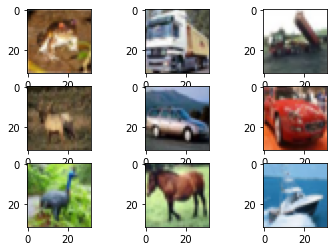

In [11]:
# load dataset
(trainX, trainy), (testX, testy) = cifar_data.load_data()
# summarize loaded dataset
print('Train: X=%s, y=%s' % (trainX.shape, trainy.shape))
print('Test: X=%s, y=%s' % (testX.shape, testy.shape))
# plot first few images
for i in range(9):
    # define subplot
    plt.subplot(330 + 1 + i)
    # plot raw pixel data
    plt.imshow(trainX[i])
# show the figure
plt.show()

In [12]:
# normalize pixel values
trainX = trainX.astype('float32') / 255
testX = testX.astype('float32') / 255

In [13]:
num_class = 10
# one hot encode target values
trainy = to_categorical(trainy,num_class)
testy = to_categorical(testy, num_class)

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 conv2d_6 (Conv2D)           (None, 16, 16, 20)        980       
                                                                 
 batch_normalization_4 (Batc  (None, 16, 16, 20)       80        
 hNormalization)                                                 
                                                                 
 leaky_re_lu_6 (LeakyReLU)   (None, 16, 16, 20)        0         
                                                                 
 dropout_6 (Dropout)         (None, 16, 16, 20)        0         
                                                                 
 conv2d_7 (Conv2D)           (None, 8, 8, 30)          5430      
                                                           

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/100
313/313 [==============================] - 4s 10ms/step - loss: 1.8285 - accuracy: 0.3558 - val_loss: 1.7966 - val_accuracy: 0.3498
Epoch 2/100
313/313 [==============================] - 3s 10ms/step - loss: 1.4520 - accuracy: 0.4775 - val_loss: 1.5069 - val_accuracy: 0.4504
Epoch 3/100
313/313 [==============================] - 3s 9ms/step - loss: 1.3184 - accuracy: 0.5258 - val_loss: 1.2609 - val_accuracy: 0.5527
Epoch 4/100
313/313 [==============================] - 3s 9ms/step - loss: 1.2459 - accuracy: 0.5551 - val_loss: 1.2166 - val_accuracy: 0.5708
Epoch 5/100
313/313 [==============================] - 3s 9ms/step - loss: 1.2012 - accuracy: 0.5723 - val_loss: 1.1426 - val_accuracy: 0.6002
Epoch 6/100
313/313 [==============================] - 3s 10ms/step - loss: 1.1686 - accuracy: 0.5823 - val_loss: 1.2535 - val_accuracy: 0.5563
Epoch 7/100
313/313 [==============================] - 3s 10ms/step - loss: 1.1379 - accuracy: 0.5953 - val_loss: 1.1723 - val_accuracy: 0.

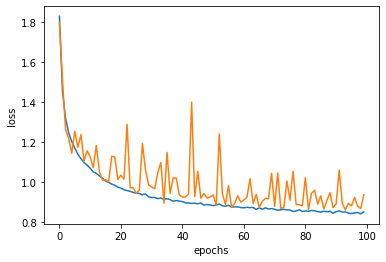

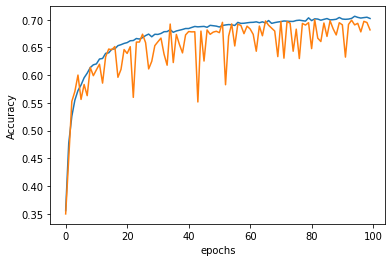

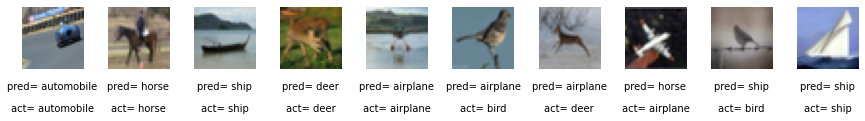

In [16]:
input_layer = Input(shape=(32,32,3))
conv_layer1 = Conv2D(filters=20,kernel_size=(4,4),strides=2,padding='same')(input_layer)
x = BatchNormalization()(conv_layer1)
x = LeakyReLU(alpha=0.001)(x)
x = Dropout(0.2)(x)
conv_layer2 = Conv2D(filters = 30, kernel_size=(3,3), strides=2, padding='same')(x)
x = BatchNormalization()(conv_layer2)
x = LeakyReLU(0.001)(x)
x = Dropout(0.2)(x)
conv_layer3 = Conv2D(filters=40, kernel_size=(3,3), strides=2, padding='same')(x)
x = LeakyReLU(0.001)(x)
x = Dropout(0.2)(x)
flatten_layer = Flatten()(x)
output_layer = Dense(units = 10, activation='softmax')(flatten_layer)

model = Model(input_layer,output_layer)
model.summary()
opt = Adam(lr = 0.001)
model.compile(optimizer = opt, loss = 'categorical_crossentropy', metrics=['accuracy'])

network_history = model.fit(trainX, trainy, batch_size = 128, epochs = 100, shuffle= True, validation_split = 0.2)
history = network_history.history
losses = history['loss']
val_loss = history['val_loss']
accuracies = history['accuracy']
val_accuracies = history['val_accuracy']
plt.xlabel('epochs')
plt.ylabel('loss')
plt.plot(losses)
plt.plot(val_loss)

plt.figure()
plt.xlabel('epochs')
plt.ylabel('Accuracy')
plt.plot(accuracies)
plt.plot(val_accuracies)

model.evaluate(testX, testy)

Classes = np.array(['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck'])
pred = model.predict(testX)
pred_single = Classes[np.argmax(pred,axis = -1)]
actual_single = Classes[np.argmax(testy, axis = -1)]


n_to_show = 10
indices = np.random.choice(range(len(testX)), n_to_show)
fig = plt.figure(figsize=(15,3))
fig.subplots_adjust(hspace = 0.4, wspace = 0.4)

for i,idx in enumerate(indices):
  img = testX[idx]
  ax = fig.add_subplot(1,n_to_show, i+1)
  ax.axis('off')
  ax.text(0.5, -0.35, 'pred= ' +str(pred_single[idx]), fontsize = 10, ha='center', transform = ax.transAxes)
  ax.text(0.5, -0.7, 'act= ' +str(actual_single[idx]), fontsize = 10, ha='center', transform = ax.transAxes)
  ax.imshow(img)


